# **WAREHOUSE ROBOTS (Shortest Path):**

find shortest path
Q-Learning Approach in Warehouse Robotics
* Utilizes intelligent Q-learning to educate warehouse robots.
* Guides robots with positive feedback for good actions and negative feedback for less-than-optimal ones.
* Allows robots to learn and adjust methods on the go.
* Increases efficiency by cleverly organizing and carrying out routes to desired locations.

Component of Warehouse Robots:
Warehouse Robot Overview
* Agent(Robot): Responsible for order fulfilment.
* Environment (warehouse): Includes items, aisles, shelves, and other robots.
* State (Possible Travel Location): Represents all possible robot travel locations.
* Action(Robot's movement) : up, down, right, or left.
* Reward: Each state assigned a reward value, aiming to maximize total rewards and minimize punishments.

# **Importing necessary libraries:**

In [1]:
import numpy as np
from matplotlib import colors
from matplotlib import pyplot
import matplotlib.patches as patches

# Define the Warehouse Layout(Environment)

Q-Learning AI Agent Environment
* Environment comprises states, actions, and rewards.
* States and actions are inputs, probable actions are outputs.
* State representation includes potential warehouse spots (Black, white and yellow squares)
* black squares : item storage areas,
* white squares : possible path where robot can travel
* green squares : packaging area
* Green and black squares represent terminal states.

AI Agent's Main Objective: Identifying Fastest Route
* 121 (11 rows * 11 columns) potential warehouse states identified.
* Each state has eleven rows and columns.
* Row and column indexes used to identify each location.

In [2]:
# Enviornment shape (states)
environment_rows = 11
environment_columns = 11

#3D Numpy Array Creation
# Contains 11 rows and 11 columns.
# Includes a third "action" dimension with 4 layers.
# Tracks Q-values for each possible action in each state.
# Initializes each state and action pair to 0.
q_values = np.zeros((environment_rows, environment_columns, 4))
print(q_values)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.

#### Actions
The Robot can move in four directions:
* Up
* Right
* Down
* Left

The AI agent must learn to avoid driving into item storage area (Black squares)


In [3]:
#actions for Robot (AI Agent)
#numberic code for action: 0 = up, 1 = right, 2 = down, 3 = left
actions = ['up', 'right', 'down', 'left']

# **REWARD INITIALIZATION**

AI Agent Environment Specification
* Each state in the warehouse is assigned a reward value for AI agent learning.
* Agents can start at any white square, aiming to maximize overall rewards.
* Negative incentives (penalties) are used for all states except the objective.
By minimising its penalties, this motivates the AI to choose the quickest path to the objective!

In [4]:
#The awards for every state should be stored in a 2D numpy array.
#Each value in the array is initialized to -100, and it has 11 rows and 11 columns to match the form of the Warehouse Environment.

rewards = np.full((environment_rows, environment_columns), -100.)
rewards[0, 5] = 100. #reward for the packaging area (Final Destination) = 100

# assign rewards to aisle location to 1 where robot can travel or move from rows 1 to 9 (white square)
aisles = {} #store locations in a dictionary
aisles[1] = [i for i in range(1, 10)]
aisles[2] = [1, 4, 7, 9]
aisles[3] = [i for i in range(3, 10)]
aisles[3].append(1)
aisles[4] = [3, 7]
aisles[5] = [i for i in range(11)]
aisles[6] = [2, 5]
aisles[7] = [i for i in range(1, 10)]
aisles[8] = [3, 7]
aisles[9] = [i for i in range(11)]

#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(1, 10):
  for column_index in aisles[row_index]:
    rewards[row_index, column_index] = -1.

#print rewards matrix
for row in rewards:
  print(row)

[-100. -100. -100. -100. -100.  100. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100.   -1. -100. -100.   -1. -100. -100.   -1. -100.   -1. -100.]
[-100.   -1. -100.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100.   -1. -100. -100.   -1. -100. -100. -100. -100. -100.]
[-100.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1.   -1. -100.]
[-100. -100. -100.   -1. -100. -100. -100.   -1. -100. -100. -100.]
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
[-100. -100. -100. -100. -100. -100. -100. -100. -100. -100. -100.]


From the above Grid , we set the reward value is 100 that is in the package area defined in the grid cell(0,5).Also we set the whitebox which is aisle location , that value is -1.

# **Visualization of Grid-based Environment without Rewards**

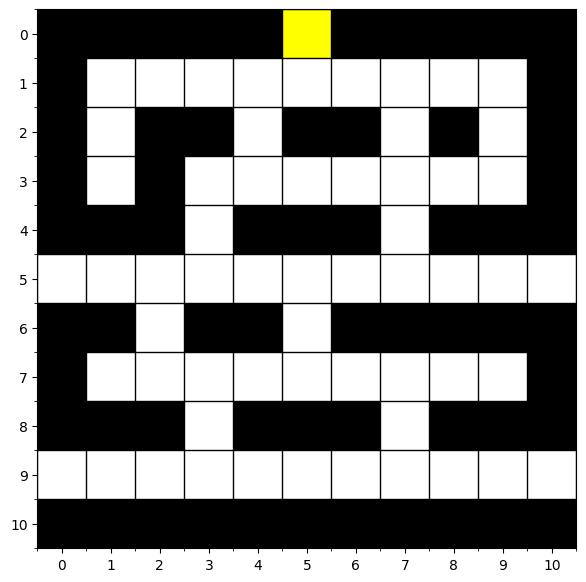

In [5]:
# Create a figure and axis

fig, ax = pyplot.subplots(figsize=(14, 7))
colormap = colors.ListedColormap(["black","white","Yellow"])
# Display the grid
ax.imshow(rewards, cmap=colormap)

# Customize the ticks and labels to make it look like a grid
ax.set_xticks(np.arange(-0.5, environment_rows, 1), minor=True)
ax.set_yticks(np.arange(-0.5, environment_rows, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
# Set aspect ratio to 'equal' for square cells
ax.set_aspect('equal')
pyplot.xticks(np.arange(0, environment_rows, 1))
pyplot.yticks(np.arange(0, environment_columns, 1))
# Show the plot
pyplot.show()

# Visualization of Grid-based Environment with Rewards

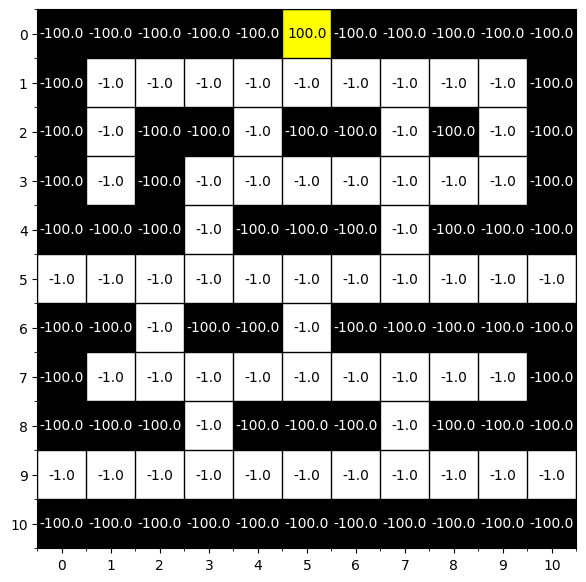

In [6]:
# Create a figure and axis
fig, ax = pyplot.subplots(figsize=(14, 7))
colormap = colors.ListedColormap(["black","white","Yellow"])
# Display the grid
ax.imshow(rewards, cmap=colormap)

# Customize the ticks and labels to make it look like a grid
ax.set_xticks(np.arange(-0.5, environment_rows, 1), minor=True)
ax.set_yticks(np.arange(-0.5, environment_rows, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
# Set aspect ratio to 'equal' for square cells
ax.set_aspect('equal')
pyplot.xticks(np.arange(0, environment_rows, 1))
pyplot.yticks(np.arange(0, environment_columns, 1))
for i, row in enumerate(rewards):
  for j, cellvalue in enumerate(row):
    label = cellvalue
    textcolor = "black"
    if(label == -100):
      textcolor = "white"
    ax.text(j,i,label, ha='center', va='center', color=textcolor)

# Show the plot
pyplot.show()

AI Agent Maximizing Rewards and Minimizing Penalties
* Discover shortest pathways between item packing area(yellow square) and other warehouse areas (white squares)
* Avoid collision with item storage places (Black squares)

# **Train the model**
AI Agent Learning Process
* Teaching AI agent about surroundings using Q-learning model
* Taking stages during learning process
1. Choose white square for agent (Start Location of Robot: White Square)
2. action selection using espilon algorithm : chooses most promising action, May occasionally select less promising options to encourage exploration
3. Perform selected action and progress to next state
4. Reward for New State Move and Update Q-value for previous state and action pair.
5. if new state is terminal state, then start again with #1 else go to #2

Repeated procedure over a thousand episodes allows AI agent to determine optimal routes for item packing, warehouse, and storage areas, preventing collisions.

In [7]:
#define a function that checks to see if the given location is in a terminal condition
def terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a terminal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True

In [8]:
#define a function that will select a non-terminal, random beginning point.
def get_random_startpoint():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_columns)
  #Until a non-terminal state is found, keep selecting random row and column indexes ('white square')
  while terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_columns)
  return current_row_index, current_column_index


In [9]:
# Define an epsilon-greedy algorithm that will choose next action to be taken
def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(4)


In [10]:
#define a function : depending on the selected action, will determine the next location
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_columns - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index


In [11]:
def get_shortest_path(start_row_index, start_column_index):
  #return immediately if this is an invalid starting location
  if terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path

Function Definition and Greedy Algorithm
* Defines function for beginning position and terminal state.
* Uses Greedy algorithm to specify next action course.
* Determines next step based on input epsilon.
* Selects next position and updates row and column values.
* Adds each location to shortest_path list until terminal state.
* Provides index of best next action based on highest Q-values.
* Returns empty list if beginning location is invalid.

# **Q -Table ACTION SELECTION**

In [12]:
def get_next_action(current_row_index, current_column_index, epsilon):
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else:
        return np.random.randint(4)

# **Training Process**

Random Selection Process
* Select highest Q value if random value is less than epsilon.
* Otherwise, random action selected.

In [13]:
epsilon = 0.857
 #Percentage of Time for Best Action
discount_factor = 0.9 #Discount Percentage for Upcoming Benefits
learning_rate = 0.9 #Expected speed of learning
for episode in range(1500):
    row, col = get_random_startpoint()

    while not terminal_state(row, col):
        action = get_next_action(row, col, epsilon)
        old_row, old_col = row, col
        row, col = get_next_location(row, col, action)

        reward = rewards[row, col]
        old_q_value = q_values[old_row, old_col, action]
        temporal_difference = reward + discount_factor * np.max(q_values[row, col]) - old_q_value

        q_values[old_row, old_col, action] += learning_rate * temporal_difference

print('Model Trained')

Model Trained


Training Process: 1000 Iterations
* Initializes starting location and Proceeds to end location
* Updates q values each action choice
* Identifies difference between previous and current values and Updates q value accordingly

# **Finding Shortest Path from Random Starting Location**

choose the random start state then it wil call the shorest path function , it will return the shortest path.

In [14]:
random_start_row, random_start_col = get_random_startpoint()
shortest_path = get_shortest_path(random_start_row, random_start_col)
print(f"Shortest Path from Random Starting Location {random_start_row, random_start_col}:", shortest_path)

Shortest Path from Random Starting Location (9, 3): [[9, 3], [8, 3], [7, 3], [7, 2], [6, 2], [5, 2], [5, 3], [4, 3], [3, 3], [3, 4], [2, 4], [1, 4], [1, 5], [0, 5]]


# **Display path in Grid Environment**
To display shortest path in Warehouse layout

In [15]:
def display_shortest_path(pathlist):
  # Create a figure and axis
  fig, ax = pyplot.subplots(figsize=(15, 6))
  colormap = colors.ListedColormap(["black","white","Yellow"])
  # Display the grid
  ax.imshow(rewards, cmap=colormap)

  # Customize the ticks and labels to make it look like a grid
  ax.set_xticks(np.arange(-0.5, environment_rows, 1), minor=True)
  ax.set_yticks(np.arange(-0.5, environment_rows, 1), minor=True)
  ax.grid(which='minor', color='black', linestyle='-', linewidth=1)
  # Set aspect ratio to 'equal' for square cells
  ax.set_aspect('equal')
  pyplot.xticks(np.arange(0, environment_rows, 1))
  pyplot.yticks(np.arange(0, environment_columns, 1))

  for i, path in enumerate(pathlist):
      lable = ""
      if(i == 0):
        lable = "Start"
        rect_location = (path[1]-0.5 , path[0]-0.5)  # (row, column)
        rect = patches.Rectangle(rect_location, 1, 1, linewidth=1, facecolor='pink')
        # Add the rectangle patch to the axis
        ax.add_patch(rect)
      elif(i == len(pathlist)-1):
        lable = "End"
      ax.text(path[1],path[0],lable, ha='center', va='center', color="black")
      if(lable == ""):
        # Specify the location where you want to change the background color
        rect_location = (path[1]-0.5 , path[0]-0.5)  # (row, column)
        rect = patches.Rectangle(rect_location, 1, 1, linewidth=1, facecolor='skyblue')
        # Add the rectangle patch to the axis
        ax.add_patch(rect)

  # Show the plot
  pyplot.show()

Get the input from the user(start and end location) and Get Shortest path

[[8, 7], [7, 7], [7, 6], [7, 5], [6, 5], [5, 5], [5, 6], [5, 7], [4, 7], [3, 7], [2, 7], [1, 7], [1, 6], [1, 5], [0, 5]]


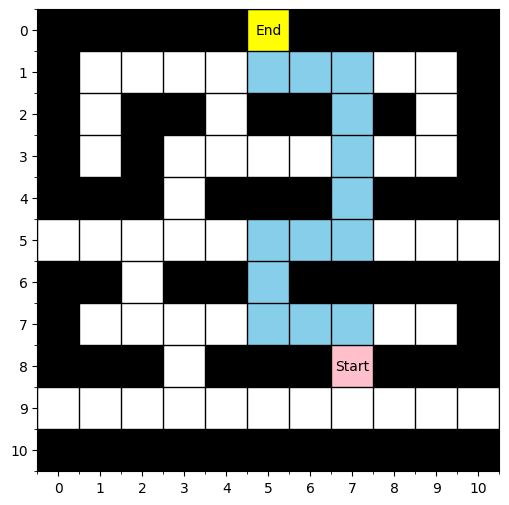

In [16]:
from IPython.display import clear_output
print("Please Enter Start Location in warehouse")
# print("Please quit to stop")
# while(1):
enter_row_index=input("\nPlease enter row index from 0 to 10:")
# if enter_row_index.lower()  in ['quit']:
#     break
enter_column_index = input("Please enter column index from 0 to 10:")
# if enter_column_index.lower()  in ['quit']:
#     break
# else:
clear_output(wait=True) # clear previous output
paths = []
if(int(enter_row_index) and int(enter_column_index)):
  paths = get_shortest_path(int(enter_row_index), int(enter_column_index))
  print(paths)
  if(len(paths) > 0):
    display_shortest_path(paths)
  else:
    print("Entered incorrect Start Location")
else:
  print("Please enter correct value")
